In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df= pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
x = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,-1]
#print(y)

In [4]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.transform(x_test)

#X_train
x_test

In [5]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [6]:
y_pred = classifier.predict(x_test)
print("Testing Accuracy Score: ", accuracy_score(y_test, y_pred))

Testing Accuracy Score:  0.9666666666666667


In [8]:
y_pred = classifier.predict(X_train)
print("Training Accuracy Score: ", accuracy_score(Y_train, y_pred))

Training Accuracy Score:  0.95


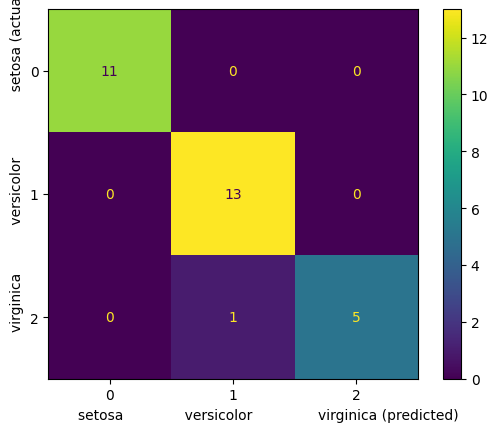

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay as CM
CM.from_predictions(y_test, classifier.predict(x_test))
plt.xlabel("                setosa              versicolor               virginica (predicted)")
plt.ylabel("                virginica           versicolor               setosa (actual)")
plt.show()